# <span style="color:red">VBMicrolensing</span>

# Head

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import VBMicrolensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Initialize

In [2]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

# System Configuration

In [3]:
#Number of lenses in the system
nlens=4 

#Source position
y=(0.1, 0.04)

#Positions in the complex plane
s = [(0., 0.), (1., -0.7), (2., 0.7), (0.6, -0.6)]

# lens mass
q = [1.,1.e-1,1.1e-4,1.1e-6] 

# source radius in Einstein radii of the total mass.
rho = 0.01 

##############################################
real_part = [x[0] for x in s] 
imaginary_part = [x[1] for x in s]
q_array = np.array(q, dtype=float)
s1_array = np.array(real_part, dtype=float)
s2_array = np.array(imaginary_part, dtype=float)
##############################################

# Set the Method that you want use : Singlepoly, Multipoly, Nopoly.
VBM.SetMethod(VBM.Method.Singlepoly)
#Call the SetLensGeometry
VBM.SetLensGeometry(nlens, q_array, s1_array, s2_array)

# Light Curve

In [4]:
# Separation between the first two lenses in descending order of mass in units of total ang. Einstein radii
s12 = 0.765

# Mass ratio lens 2
q2 = 0.00066

# impact parameter
u0 = 0.0060

# alpha
alpha= 3.212

# source radius in Einstein radii of the total mass.
rho = 0.00567

# einstein radius crossing time
tE = 50.13

# time of peak magnification
t0 = 0

#eparation between the last two lenses in descending order of mass in units of total ang. Einstein radii
s23=1.5

# Mass ratio lens 3
q3=0.000001

# beta
beta=-1.5


num_points = 1000
tmin = -50
tmax = 50
t = np.linspace(t0 + tmin, t0 + tmax, num_points)


tau = (t - t0)/tE
y1 = -u0*np.sin(alpha) + tau*np.cos(alpha)
y2 = u0*np.cos(alpha) + tau*np.sin(alpha)


params = [np.log(s12), np.log(q2), u0, alpha, np.log(rho), np.log(tE), t0, np.log(s23), np.log(q3), beta]
magtriple = VBM.TripleLightCurve(params, t)

In [5]:
# Calculate the cirtical curves and the caustic curves
solutions = VBM.PlotCrit() # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBMicrolensing.VBMicrolensing._sols'>


In [6]:
# generator function iterating over _sols, _curve, or _point objects 
# making use of the next keyword
def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

(-1.5, 1.5)

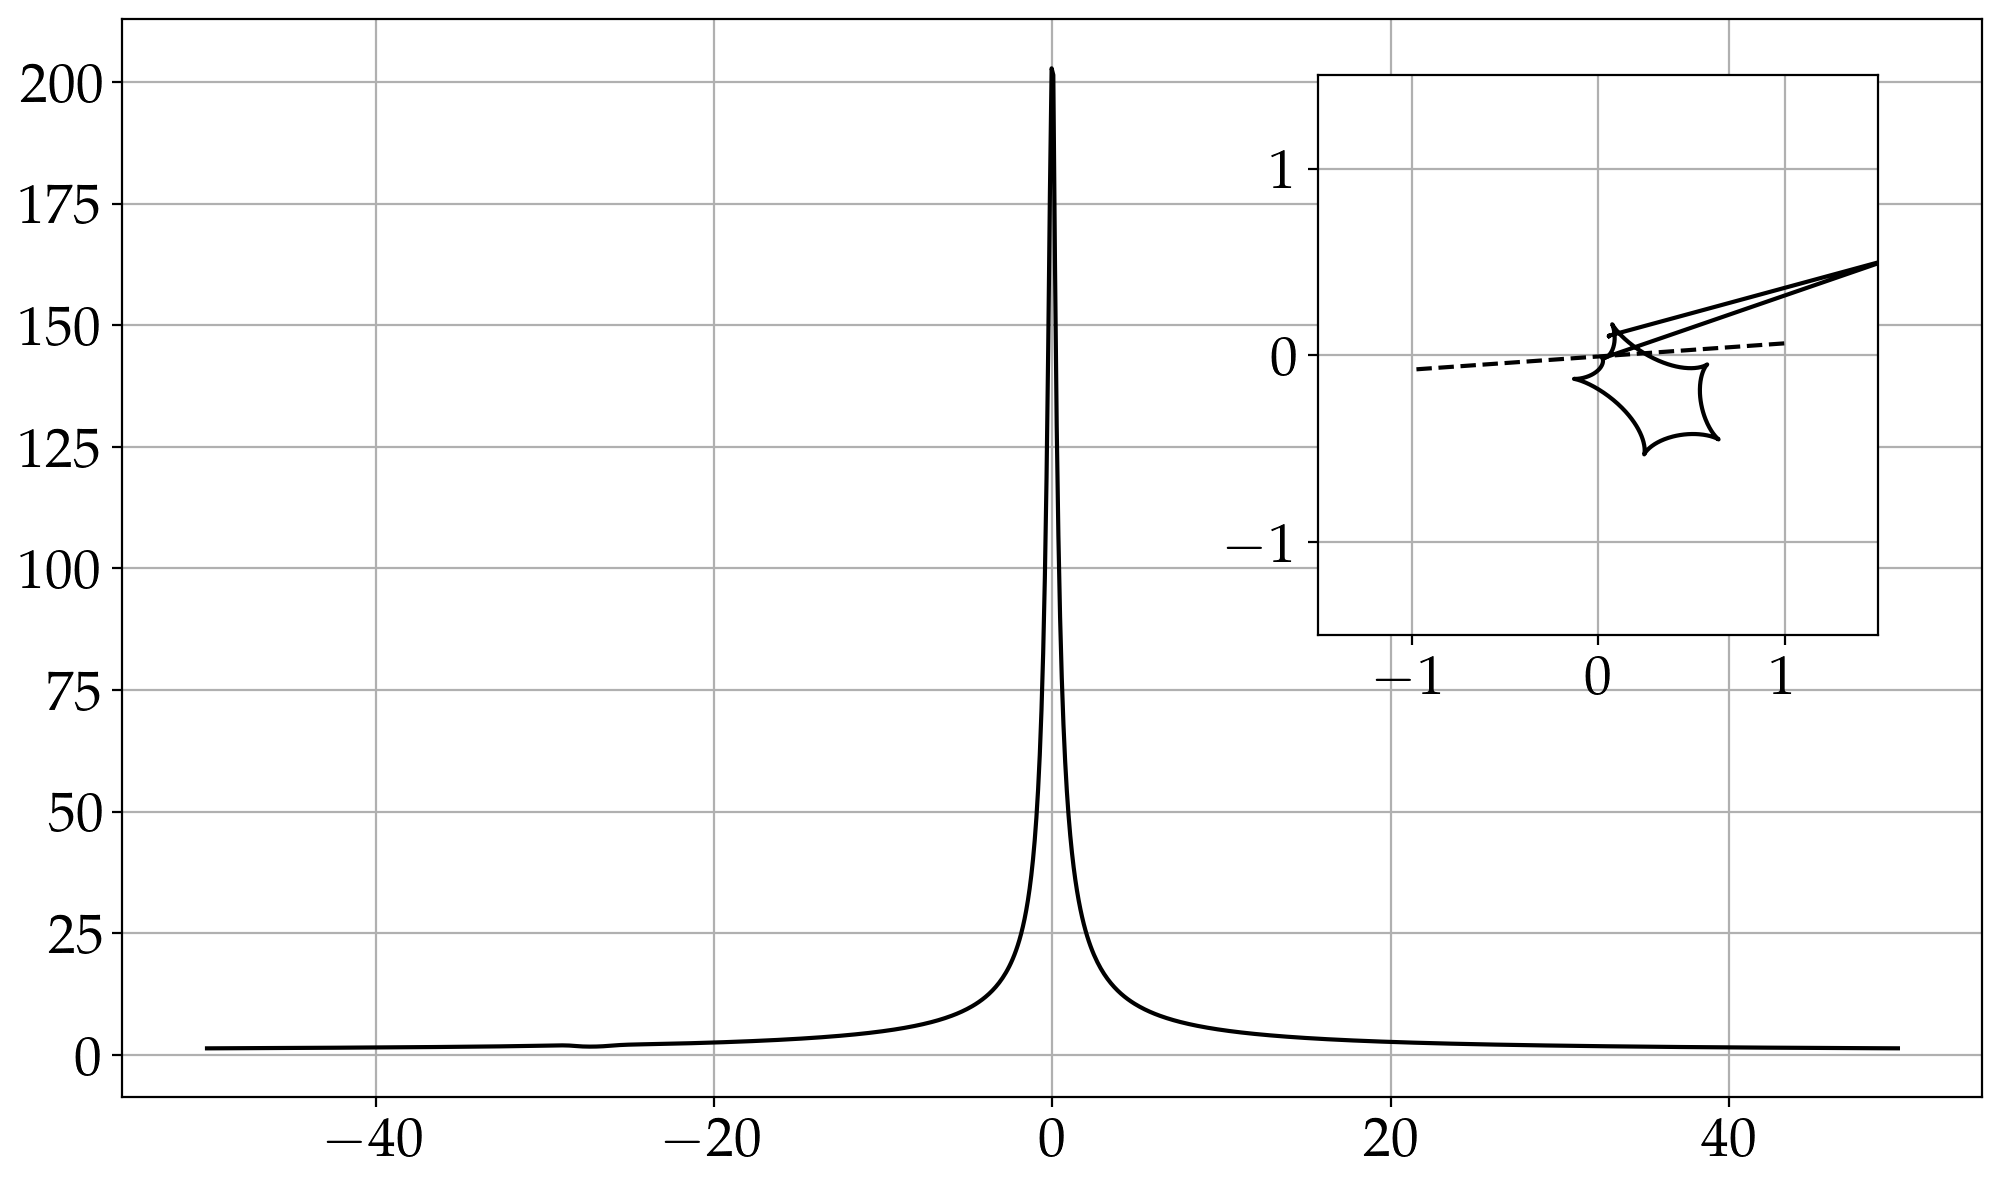

In [7]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(t, magtriple[0], 'k-')
ax.grid(True)

ax2 = fig.add_axes([.54, .44, .4, .4], aspect=1)
ax2.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'k-')
ax2.plot(y1, y2, 'k--')
ax2.grid(True)
ax2.set_xlim(-1.5,1.5)
ax2.set_ylim(-1.5,1.5)